#  Battle of the  Neighborhoods (Applied DS Capstone) - Week 2

## Table of contents
* [Introduction/Business Problem](#introduction)
* [Data](#data)
* [Analysis](#analysis)

## Introduction/Business Problem <a name="introduction"></a>

####  Brief Background

   After being in our nation’s capital for over two years now, I have been fortunate enough to experience a variety of Washington D.C.’s attractions and resources that make the city such a hot commodity. With experience in exploring various neighborhoods all over the area, one asset of this location is very apparent—there is an extremely diverse portfolio of restaurant options in this area. This development of food options continues to expand, and the District of Columbia is attracting various tourists from all over the country who hope to find new and exciting restaurants to try in a fairly unfamiliar environment. With limited knowledge of the city’s layout and so many neighborhoods to choose from, these groups of people might wonder where exactly the best location to try a cuisine of interest might be.

   Fortunately, for those whom this might appeal to, through Foursquare Places, a location data provider, few API calls can be made to trace the popular restaurants by cuisine in each neighborhood in Washington, D.C. This information can then be used by tourists hoping to eat at a restaurant in order to carefully target food options that are closer to the tourist attractions they might experience and possess the most positive feedback. 
   
   As my favorite restaurant in Washington, D.C. is an Italian Restaurant, I feel as though this was an appropriate cuisine category to further explore.

#### Specifics of My Project

For this project we will try to find the best restaurant location for a tourist to eat with friends and/or family while visiting the area. Specifically, this report will be targeted to stakeholders interested in opening an **Italian Restaurant** in **Washington, D.C.**

As there are numerous restaurants in the Washington, D.C. area, we will try to detect **locations that contain numerous options for Italian restaurants**. I imagine that we would also prefer locations **as close to the city center as possible**, in order to make it easier for tourists who are already visiting major attractions around the city to walk to these locations.

I will use my data science expertise to generate a handful of locations that would provide the best Italian dining experience based on this criteria layed out above. Additionally, I will explain advantages of each area so that best possible final location can be chosen by relevant tourists visiting the D.C. area.

## Data <a name="data"></a>

Per the problem clearly defined above, here are the factors that will be targeted specifically:
* number of and distance to Italian restaurants from Washington, D.C. city center
* number of likes for each Italian restaurant, to help explain popularity 

Data sources of the following areas will be needed to extract/generate the required information as listed above:
* Coordinate of Washington, D.C. center will be obtained using **Geocoder library reverse geocoding**
* Number of Italian restaurants and their number of likes and distance will be obtained using **Foursquare API**

### Import Libraries

Alright, first we will import a majority of appropriate libraries needed to carry out our analysis. We will import additional libraries as needed as we continue to move through our notebook.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analysis
import random # library to generate random numbers 

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Using Geocoder library 

First, we need to obtain the coordinates of our starting point, which is the center if Washington, D.C. We will use the Geocoder Nominatim package in order to do so.

In [33]:
address = 'Washington, District of Columbia'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Washington, D.C. are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Washington, D.C. are 38.8948932, -77.0365529.


In [145]:
dc_coordinates = [latitude, longitude]

Nice. Now we have a solid starting point to base our Foursquare API endpoint search off of. Let's move on to define our search query and additional parameters.

### Foursquare API Search Endpoint

In order to focus on Italian restaurants within a defined distance from our coordinates, we will first define our search_query as "Italian" and set our radius boundary.

In [34]:
search_query = 'Italian'
radius = 5000
print(search_query + ' .... OK!')

Italian .... OK!


Now, in order to conduct our search, we need to define our credentials (API Client ID, Client Secret, and Version). Also, we should limit the number of Italian restaurants that we search.

In [35]:
# @hidden_cell
CLIENT_ID = 'I1NHS11ITPG15MCKKTHQ430ZLLVXRWGSL2TC12HMELYDNPZL' 
CLIENT_SECRET = 'LETWEQWJS0ECF30UGP5RZSCGLGBUDR4HU1BCB4CJOIMVRFZ3'
VERSION = '20180605'
LIMIT = 50

Great. Now, let's define our search url using our credentials, radius, limit, and coordinates of Washington, D.C.

In [36]:
# create URL
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,
    latitude,
    longitude,
    VERSION,
    search_query,
    radius,
    LIMIT
)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=I1NHS11ITPG15MCKKTHQ430ZLLVXRWGSL2TC12HMELYDNPZL&client_secret=LETWEQWJS0ECF30UGP5RZSCGLGBUDR4HU1BCB4CJOIMVRFZ3&ll=38.8948932,-77.0365529&v=20180605&query=Italian&radius=5000&limit=50'

We conduct a search using our url and convert our results to a JSON file that will be used to retrieve relevant information about each Italian restaurant.

In [37]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dfcecba660a9f0025674071'},
 'response': {'venues': [{'id': '4bc3479c4cdfc9b6b4159721',
    'name': 'Italian Gourmet & Deli',
    'location': {'address': '1212 New York Ave NW',
     'crossStreet': '12th St NW',
     'lat': 38.900523609730485,
     'lng': -77.02883289508179,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.900523609730485,
       'lng': -77.02883289508179}],
     'distance': 916,
     'postalCode': '20005',
     'cc': 'US',
     'city': 'Washington',
     'state': 'D.C.',
     'country': 'United States',
     'formattedAddress': ['1212 New York Ave NW (12th St NW)',
      'Washington, D.C. 20005',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d146941735',
      'name': 'Deli / Bodega',
      'pluralName': 'Delis / Bodegas',
      'shortName': 'Deli / Bodega',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_',
       'suffix': '.png'},
      'primary': True}],
    'delivery'

To make this more accessible, we convert our venues from our search to cells in a pandas dataframe.

In [38]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
df = json_normalize(venues)
df

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood,venuePage.id
0,4bc3479c4cdfc9b6b4159721,Italian Gourmet & Deli,"[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",v-1576856921,False,1212 New York Ave NW,12th St NW,38.900524,-77.028833,"[{'label': 'display', 'lat': 38.90052360973048...",...,United States,"[1212 New York Ave NW (12th St NW), Washington...",1332915,https://www.grubhub.com/restaurant/italian-gou...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
1,4ca6b9ed44a8224bfd990640,Dupont Italian Kitchen,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1576856921,False,1637 17th St NW,at R St NW,38.912444,-77.038241,"[{'label': 'display', 'lat': 38.91244391816783...",...,United States,"[1637 17th St NW (at R St NW), Washington, D.C...",1717927,https://www.grubhub.com/restaurant/dupont-ital...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
2,4c6daf4865eda09341614fd0,Rita's Italian Ice & Frozen Custard,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",v-1576856921,False,610 H St NW,NaN,38.899659,-77.020675,"[{'label': 'display', 'lat': 38.8996585731722,...",...,United States,"[610 H St NW, Washington, D.C. 20001, United S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,575ae890498e04099a6d1c67,RPM Italian,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1576856921,False,650 K St NW,at 7th St NW,38.902220,-77.020940,"[{'label': 'display', 'lat': 38.90222, 'lng': ...",...,United States,"[650 K St NW (at 7th St NW), Washington, D.C. ...",384707,https://www.grubhub.com/restaurant/rpm-italian...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
4,4b2d845af964a5203bd824e3,Italian Kitchen,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1576856921,False,1110 U St NW,at 11th St NW,38.917027,-77.027767,"[{'label': 'display', 'lat': 38.91702694013223...",...,United States,"[1110 U St NW (at 11th St NW), Washington, D.C...",78545,https://www.grubhub.com/restaurant/italian-kit...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
5,52727dbb498ed6bed97d9382,Italian Gourmet Deli,"[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",v-1576856921,False,1707 L St NW,NaN,38.903741,-77.039324,"[{'label': 'display', 'lat': 38.903740540996, ...",...,United States,"[1707 L St NW, Washington, D.C. 20036, United ...",291242,https://www.grubhub.com/restaurant/italian-gou...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
6,4c3b50185810a593cb73ba3c,Carmine’s Italian Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1576856921,False,425 7th St NW,NaN,38.895685,-77.021766,"[{'label': 'display', 'lat': 38.8956851, 'lng'...",...,United States,"[425 7th St NW, Washington, D.C. 20004, United...",296898,https://www.grubhub.com/restaurant/carmines-42...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
7,4cb49fc9cbab236a17c0bf73,National Italian American Foundation,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1576856921,False,1860 19th St NW,NaN,38.915129,-77.043794,"[{'label': 'display', 'lat': 38.91512863107701...",...,United States,"[1860 19th St NW, Washington, D.C. 20009, Unit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4af46325f964a520f7f121e3,Vace Italian Delicatessen & Homemade Pasta,"[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",v-1576856921,False,3315 Connecticut Ave NW,NaN,38.933997,-77.057167,"[{'label': 'display', 'lat': 38.93399668810997...",...,United States,"[3315 Connecticut Ave NW, Washing

There is a great deal of irrelevant information in our dataframe, so we can filter this by venue information only relevant to location.

In [39]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
df2 = df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df2['categories'] = df2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df2.columns = [column.split('.')[-1] for column in df2.columns]

df2

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Italian Gourmet & Deli,Deli / Bodega,1212 New York Ave NW,12th St NW,38.900524,-77.028833,"[{'label': 'display', 'lat': 38.90052360973048...",916,20005,US,Washington,D.C.,United States,"[1212 New York Ave NW (12th St NW), Washington...",NaN,4bc3479c4cdfc9b6b4159721
1,Dupont Italian Kitchen,Italian Restaurant,1637 17th St NW,at R St NW,38.912444,-77.038241,"[{'label': 'display', 'lat': 38.91244391816783...",1959,20009,US,Washington,D.C.,United States,"[1637 17th St NW (at R St NW), Washington, D.C...",NaN,4ca6b9ed44a8224bfd990640
2,Rita's Italian Ice & Frozen Custard,Ice Cream Shop,610 H St NW,NaN,38.899659,-77.020675,"[{'label': 'display', 'lat': 38.8996585731722,...",1474,20001,US,Washington,D.C.,United States,"[610 H St NW, Washington, D.C. 20001, United S...",NaN,4c6daf4865eda09341614fd0
3,RPM Italian,Italian Restaurant,650 K St NW,at 7th St NW,38.902220,-77.020940,"[{'label': 'display', 'lat': 38.90222, 'lng': ...",1579,20001,US,Washington,D.C.,United States,"[650 K St NW (at 7th St NW), Washington, D.C. ...",NaN,575ae890498e04099a6d1c67
4,Italian Kitchen,Pizza Place,1110 U St NW,at 11th St NW,38.917027,-77.027767,"[{'label': 'display', 'lat': 38.91702694013223...",2578,20009,US,Washington,D.C.,United States,"[1110 U St NW (at 11th St NW), Washington, D.C...",NaN,4b2d845af964a5203bd824e3
5,Italian Gourmet Deli,Deli / Bodega,1707 L St NW,NaN,38.903741,-77.039324,"[{'label': 'display', 'lat': 38.903740540996, ...",1013,20036,US,Washington,D.C.,United States,"[1707 L St NW, Washington, D.C. 20036, United ...",NaN,52727dbb498ed6bed97d9382
6,Carmine’s Italian Restaurant,Italian Restaurant,425 7th St NW,NaN,38.895685,-77.021766,"[{'label': 'display', 'lat': 38.8956851, 'lng'...",1284,20004,US,Washington,D.C.,United States,"[425 7th St NW, Washington, D.C. 20004, United...",NaN,4c3b50185810a593cb73ba3c
7,National Italian American Foundation,Office,1860 19th St NW,NaN,38.915129,-77.043794,"[{'label': 'display', 'lat': 38.91512863107701...",2338,20009,US,Washington,D.C.,United States,"[1860 19th St NW, Washington, D.C. 20009, Unit...",NaN,4cb49fc9cbab236a17c0bf73
8,Vace Italian Delicatessen & Homemade Pasta,Deli / Bodega,3315 Connecticut Ave NW,NaN,38.933997,-77.057167,"[{'label': 'display', 'lat': 38.93399668810997...",4704,20008,US,Washington,D.C.,United States,"[3315 Connecticut Ave NW, Washington, D.C. 200...",NaN,4af46325f964a520f7f121e3
9,Bozzelli's Italian Deli,Sandwich Place,1025 Vermont Ave NW,L St NW,38.903522,-77.033132,"[{'label': 'display', 'lat': 38.90352210047489...",1005,20005,US,Washington,D.C.,United States,"[1025 Vermont Ave NW (L St NW), Washington, D....",NaN,56bb9cef498ebbd4a59f69ae


Also, we will need to define a venue id list to generate the number of likes for each Italian restaurant so we'll define that. 

In [40]:
# Extracting venue id from dataset
venue_id_list=df2['id']

Now, let's create a loop that will create a list containing the number of likes for each Italian restaurant

In [41]:
# Extracting number of likes from each venue

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[0, 97, 25, 151, 37, 15, 233, 0, 54, 10, 3, 1, 241, 1, 26, 15, 1, 4, 0, 0, 0, 41, 0, 0, 21, 1, 18, 0, 4, 2, 34, 0, 2, 0, 1, 21, 0, 0, 0, 68, 0, 2, 5, 1, 54, 12, 7]


Let's transform this list into a dataframe that lists the number of likes for each Italian restaurant index.

In [130]:
like_list2=pd.DataFrame(like_list)
like_list2.rename(columns = {0:'Likes'}, inplace=True)
like_list2

,Likes
0,0
1,97
2,25
3,151
4,37
5,15
6,233
7,0
8,54
9,10


And now we'll merge this dataframe to our main dataframe so it will contain a new column containing the number of likes

In [131]:
# Add Like column to the main dataset
df3 = pd.concat([df2, like_list2], axis = 1)
df3

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id,Likes
0,Italian Gourmet & Deli,Deli / Bodega,1212 New York Ave NW,12th St NW,38.900524,-77.028833,"[{'label': 'display', 'lat': 38.90052360973048...",916,20005,US,Washington,D.C.,United States,"[1212 New York Ave NW (12th St NW), Washington...",NaN,4bc3479c4cdfc9b6b4159721,0
1,Dupont Italian Kitchen,Italian Restaurant,1637 17th St NW,at R St NW,38.912444,-77.038241,"[{'label': 'display', 'lat': 38.91244391816783...",1959,20009,US,Washington,D.C.,United States,"[1637 17th St NW (at R St NW), Washington, D.C...",NaN,4ca6b9ed44a8224bfd990640,97
2,Rita's Italian Ice & Frozen Custard,Ice Cream Shop,610 H St NW,NaN,38.899659,-77.020675,"[{'label': 'display', 'lat': 38.8996585731722,...",1474,20001,US,Washington,D.C.,United States,"[610 H St NW, Washington, D.C. 20001, United S...",NaN,4c6daf4865eda09341614fd0,25
3,RPM Italian,Italian Restaurant,650 K St NW,at 7th St NW,38.902220,-77.020940,"[{'label': 'display', 'lat': 38.90222, 'lng': ...",1579,20001,US,Washington,D.C.,United States,"[650 K St NW (at 7th St NW), Washington, D.C. ...",NaN,575ae890498e04099a6d1c67,151
4,Italian Kitchen,Pizza Place,1110 U St NW,at 11th St NW,38.917027,-77.027767,"[{'label': 'display', 'lat': 38.91702694013223...",2578,20009,US,Washington,D.C.,United States,"[1110 U St NW (at 11th St NW), Washington, D.C...",NaN,4b2d845af964a5203bd824e3,37
5,Italian Gourmet Deli,Deli / Bodega,1707 L St NW,NaN,38.903741,-77.039324,"[{'label': 'display', 'lat': 38.903740540996, ...",1013,20036,US,Washington,D.C.,United States,"[1707 L St NW, Washington, D.C. 20036, United ...",NaN,52727dbb498ed6bed97d9382,15
6,Carmine’s Italian Restaurant,Italian Restaurant,425 7th St NW,NaN,38.895685,-77.021766,"[{'label': 'display', 'lat': 38.8956851, 'lng'...",1284,20004,US,Washington,D.C.,United States,"[425 7th St NW, Washington, D.C. 20004, United...",NaN,4c3b50185810a593cb73ba3c,233
7,National Italian American Foundation,Office,1860 19th St NW,NaN,38.915129,-77.043794,"[{'label': 'display', 'lat': 38.91512863107701...",2338,20009,US,Washington,D.C.,United States,"[1860 19th St NW, Washington, D.C. 20009, Unit...",NaN,4cb49fc9cbab236a17c0bf73,0
8,Vace Italian Delicatessen & Homemade Pasta,Deli / Bodega,3315 Connecticut Ave NW,NaN,38.933997,-77.057167,"[{'label': 'display', 'lat': 38.93399668810997...",4704,20008,US,Washington,D.C.,United States,"[3315 Connecticut Ave NW, Washington, D.C. 200...",NaN,4af46325f964a520f7f121e3,54
9,Bozzelli's Italian Deli,Sandwich Place,1025 Vermont Ave NW,L St NW,38.903522,-77.033132,"[{'label': 'display', 'lat': 38.90352210047489...",1005,20005,US,Washington,D.C.,United States,"[1025 Vermont Ave NW (L St NW), Washington, D....",NaN,56bb9cef498ebbd4a59f69ae,10


In [133]:
# Sort the table in descending order based on number of Likes
df4=df3.sort_values(by='Likes', ascending=False)
df4

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id,Likes
12,The Italian Store,Grocery Store,3123 Lee Hwy,at Spout Run Pkwy,38.896651,-77.096588,"[{'label': 'display', 'lat': 38.89665053332292...",5204,22201,US,Arlington,VA,United States,"[3123 Lee Hwy (at Spout Run Pkwy), Arlington, ...",NaN,4a7de617f964a5201ff01fe3,241
6,Carmine’s Italian Restaurant,Italian Restaurant,425 7th St NW,NaN,38.895685,-77.021766,"[{'label': 'display', 'lat': 38.8956851, 'lng'...",1284,20004,US,Washington,D.C.,United States,"[425 7th St NW, Washington, D.C. 20004, United...",NaN,4c3b50185810a593cb73ba3c,233
3,RPM Italian,Italian Restaurant,650 K St NW,at 7th St NW,38.902220,-77.020940,"[{'label': 'display', 'lat': 38.90222, 'lng': ...",1579,20001,US,Washington,D.C.,United States,"[650 K St NW (at 7th St NW), Washington, D.C. ...",NaN,575ae890498e04099a6d1c67,151
1,Dupont Italian Kitchen,Italian Restaurant,1637 17th St NW,at R St NW,38.912444,-77.038241,"[{'label': 'display', 'lat': 38.91244391816783...",1959,20009,US,Washington,D.C.,United States,"[1637 17th St NW (at R St NW), Washington, D.C...",NaN,4ca6b9ed44a8224bfd990640,97
39,La Tomate,Italian Restaurant,1701 Connecticut Ave NW,NaN,38.912900,-77.045062,"[{'label': 'display', 'lat': 38.91289993601893...",2135,20009,US,Washington,D.C.,United States,"[1701 Connecticut Ave NW, Washington, D.C. 200...",NaN,4a70f0d6f964a520d5d81fe3,68
44,Buca di Beppo,Italian Restaurant,1825 Connecticut Ave NW,at Florida Ave,38.914835,-77.045853,"[{'label': 'display', 'lat': 38.91483458786528...",2361,20009,US,Washington,D.C.,United States,"[1825 Connecticut Ave NW (at Florida Ave), Was...",NaN,4ac7dfaaf964a52040ba20e3,54
8,Vace Italian Delicatessen & Homemade Pasta,Deli / Bodega,3315 Connecticut Ave NW,NaN,38.933997,-77.057167,"[{'label': 'display', 'lat': 38.93399668810997...",4704,20008,US,Washington,D.C.,United States,"[3315 Connecticut Ave NW, Washington, D.C. 200...",NaN,4af46325f964a520f7f121e3,54
21,The Italians Kitchen,Pizza Place,2608 Connecticut Ave NW,btwn Calvert & 24th St NW,38.924024,-77.052003,"[{'label': 'display', 'lat': 38.92402386519178...",3508,20008,US,Washington,D.C.,United States,[2608 Connecticut Ave NW (btwn Calvert & 24th ...,Woodley Park,4e00c72eb61c1fbe8dfb68f7,41
4,Italian Kitchen,Pizza Place,1110 U St NW,at 11th St NW,38.917027,-77.027767,"[{'label': 'display', 'lat': 38.91702694013223...",2578,20009,US,Washington,D.C.,United States,"[1110 U St NW (at 11th St NW), Washington, D.C...",NaN,4b2d845af964a5203bd824e3,37
30,Al Tiramisu,Italian Restaurant,2014 P St NW,btwn 20th & 21st St NW,38.909569,-77.045607,"[{'label': 'display', 'lat': 38.909569, 'lng':...",1812,20036,US,Washington,D.C.,United States,"[2014 P St NW (btwn 20th & 21st St NW), Washin...",NaN,4b660847f964a520a00f2be3,34


We need to create a new dataframe object that is a list of all venue id's

In [45]:
df4['id']

12    4a7de617f964a5201ff01fe3
6     4c3b50185810a593cb73ba3c
3     575ae890498e04099a6d1c67
1     4ca6b9ed44a8224bfd990640
39    4a70f0d6f964a520d5d81fe3
44    4ac7dfaaf964a52040ba20e3
8     4af46325f964a520f7f121e3
21    4e00c72eb61c1fbe8dfb68f7
4     4b2d845af964a5203bd824e3
30    4b660847f964a520a00f2be3
14    5935f7326cf01a77c9f2fdbe
2     4c6daf4865eda09341614fd0
24    4d079be630a58cfa008fb1e7
35    535144c811d23ed68b4c0675
26    4d72ef71d145a1cdaca2bcf3
5     52727dbb498ed6bed97d9382
15    4c27e695ed0ac9b6d9805faa
45    4a9c16ecf964a520f33520e3
9     56bb9cef498ebbd4a59f69ae
46    4b5c9455f964a520b73729e3
42    5ba024fcf427de002c3e6923
28    5cc12575971317003a172769
17    4ac2407ef964a520659820e3
10    512e338ee4b0e449f6ca3de2
32    566f508e498ed2663ed9bcd0
41    4b23ce9df964a520265a24e3
29    4b1a9401f964a520b4ec23e3
34    5910f67b26659b44d9ff6a84
13    4de53ef2fa764cf4bec3ee6d
11    55082a66498ec1e7479f9431
43    4bb4d44b86a8d13ab4f0de7f
16    4e68d96bcc3f39dbbd1ef3f2
25    58

We use this filter object to create a more simplified dataframe that contains only the name, distance from our city center coordinates, and number of likes per venue.

In [136]:
# Separate name, distance and Likes columns from our main dataframe
df5 = df4[['name','distance','Likes']]
df5

,name,distance,Likes
12,The Italian Store,5204,241
6,Carmine’s Italian Restaurant,1284,233
3,RPM Italian,1579,151
1,Dupont Italian Kitchen,1959,97
39,La Tomate,2135,68
44,Buca di Beppo,2361,54
8,Vace Italian Delicatessen & Homemade Pasta,4704,54
21,The Italians Kitchen,3508,41
4,Italian Kitchen,2578,37
30,Al Tiramisu,1812,34


### Analysis <a name="analysis"></a>

Now, it's time to conduct K Means analysis on our newly created dataframe. We will first normalize our dataframe.

In [138]:
# Normalize the dataframe
from sklearn.preprocessing import StandardScaler

X = df5.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
pd.DataFrame(cluster_dataset)

,0,1
0,1.289273,4.069863
1,-1.219368,3.918636
2,-1.030580,2.368557
3,-0.787395,1.347773
4,-0.674762,0.799574
5,-0.530131,0.534926
6,0.969293,0.534926
7,0.203902,0.289182
8,-0.391260,0.213568
9,-0.881469,0.156858


We will initialize our k means clustering and set our number of clusters as 3 (clusters = 0,1,2).

In [50]:
# Initialize k means clustering method
from sklearn.cluster import KMeans
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[1 1 1 2 2 2 0 0 2 2 2 2 0 0 0 2 0 2 2 0 0 2 2 2 0 2 0 0 0 2 0 2 0 2 0 2 2
 0 0 0 0 2 0 0 0 2 0]


Each row in our simplified dataframe will be assigned a cluster label that we initialized above.

In [139]:
# Each row is assigned a label
df5["Labels"] = labels
df5.head(30)

/Users/loganwalker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,distance,Likes,Labels
12,The Italian Store,5204,241,1
6,Carmine’s Italian Restaurant,1284,233,1
3,RPM Italian,1579,151,1
1,Dupont Italian Kitchen,1959,97,2
39,La Tomate,2135,68,2
44,Buca di Beppo,2361,54,2
8,Vace Italian Delicatessen & Homemade Pasta,4704,54,0
21,The Italians Kitchen,3508,41,0
4,Italian Kitchen,2578,37,2
30,Al Tiramisu,1812,34,2


Let's visualize our clustering of the venues using a histogram. This will depict the number of Italian Restaurants that fall into each cluster based on the table above.

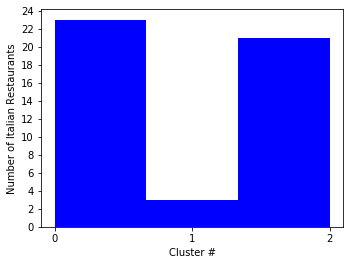

In [66]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x=df5['Labels']
num_bins = 3
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=1)
plt.subplots_adjust(left=.2)
plt.xticks(range(0, 3))
plt.yticks(range(0, 26, 2))
plt.xlabel('Cluster #')
plt.ylabel('Number of Italian Restaurants')
plt.show()

In [141]:
# Check the centroid values by averaging the features in each cluster
df5.groupby('Labels').mean()

,distance,Likes
Labels,,
0,4487.347826,8.260870
1,2689.000000,208.333333
2,1839.285714,18.714286


We will then create a new dataframe that describes our k means cluster centers for each k means cluster label created above.

In [142]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0], dtype=int32)

In [158]:
k_means_cluster_centers = k_means.cluster_centers_
kmeans_centers = pd.DataFrame(k_means_cluster_centers)
kmeans_centers.columns = ['distance','Likes']
kmeans_centers

,distance,Likes
0,0.830645,-0.329699
1,-0.320225,3.452352
2,-0.864007,-0.132094


Great. Let's create our own k means cluster map for each cluster label (labels: cluster 0 = red, cluster 1 = yellow, cluster 2 = blue). Our cluster centroids will be depicted in the lower lefthand corner and individual cluster datapoints will be mapped according to our normalized cluster datapoint dataframe created above.

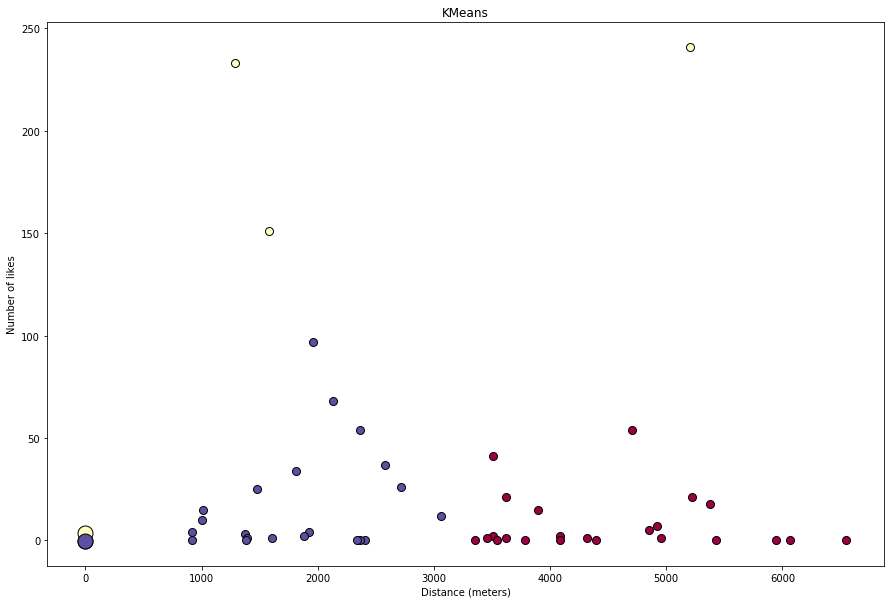

In [160]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[-1.5,1],[1,3],[3,6]])), colors):

    # create a list of all datapoints, where the datapoints that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='o', markeredgecolor='k', markersize=8)
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=15)

# title of the plot
ax.set(title='KMeans',
    ylabel='Number of likes',
    xlabel='Distance (meters)')

# remove x-axis ticks
# ax.set_xticks(())

# remove y-axis ticks
# ax.set_yticks(())

# show the plot
plt.show()

We can also show restaurants associated with each cluster label to help give us a better sense of the restaurants were clustered.

In [74]:
# Name of Italian Restaurants in cluster 0
df5.loc[df5['Labels']==0]

,name,distance,Like,Labels
8,Vace Italian Delicatessen & Homemade Pasta,4704,54,0
21,The Italians Kitchen,3508,41,0
24,Bozzelli's Italian Deli,5226,21,0
35,Radici,3625,21,0
26,SOCCi Urban Italian Kitchen + Bar,5380,18,0
15,Rita's Italian Ice & Frozen Custard,3899,15,0
46,La Bettola Italiano,4917,7,0
42,Federico Ristorante Italiano By Freddie,4849,5,0
32,The Italians kitchen,3510,2,0
29,Villa Fresh Italian Kitchen,4085,2,0


In [75]:
# Name of Italian Restaurants in cluster 1
df5.loc[df5['Labels']==1]

,name,distance,Like,Labels
12,The Italian Store,5204,241,1
6,Carmine’s Italian Restaurant,1284,233,1
3,RPM Italian,1579,151,1


In [76]:
# Name of Italian Restaurants in cluster 2
df5.loc[df5['Labels']==2]

,name,distance,Like,Labels
1,Dupont Italian Kitchen,1959,97,2
39,La Tomate,2135,68,2
44,Buca di Beppo,2361,54,2
4,Italian Kitchen,2578,37,2
30,Al Tiramisu,1812,34,2
14,Capo Italian Deli,2713,26,2
2,Rita's Italian Ice & Frozen Custard,1474,25,2
5,Italian Gourmet Deli,1013,15,2
45,Bistro Italiano,3059,12,2
9,Bozzelli's Italian Deli,1005,10,2


So, it is clear that each cluster label can be categorized as following:
* Cluster 0 = Far from city center, low number of likes
* Cluster 1 = Close to or far from city center, high number of likes
* Cluster 2 = Close to city center, low number of likes

Let's also creat a neutral scatterplot showing all of our datapoints.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


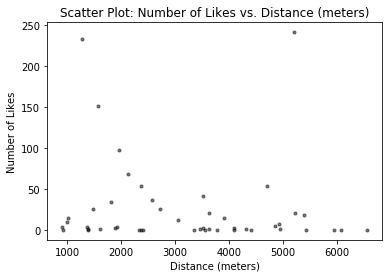

In [123]:
a = df5.distance
b = df5.Like
colors = (0,0,0)
area = np.pi*3

plt.scatter(a, b, s=area, c=colors, alpha=0.5)
plt.title('Scatter Plot: Number of Likes vs. Distance (meters)')
plt.xlabel('Distance (meters)')
plt.ylabel('Number of Likes')
plt.show()

Let's further confirm if these findings are true by creating a dendrogram of our datapoints. Each vertical line will be labeled with its corresponding index from our simplified dataframe. Also, new colors will be assigned (Cluster 0 = red, Cluster 1 = blue, Cluster 2 = green).

In [124]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

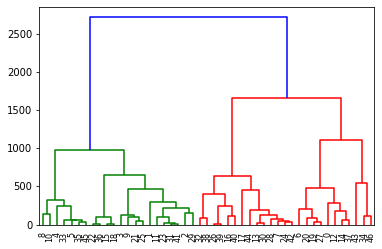

In [125]:
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt
X = df5.iloc[:, [1, 2]].values
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

We can also use agglomerative clustering to account for special cases. In this method, we assign each datapoint to its own cluster and compute similarity based on distance only rather than accounting for the number of likes for each venue.

In [126]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(X)
Agglolabels = model.labels_
Agglolabels

array([0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1,
       1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0,
       2, 1, 0])

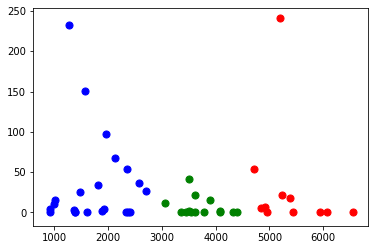

In [127]:
plt.scatter(X[Agglolabels==0, 0], X[Agglolabels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[Agglolabels==1, 0], X[Agglolabels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[Agglolabels==2, 0], X[Agglolabels==2, 1], s=50, marker='o', color='green')
plt.show()

Finally, we will perform analysis using DBSCAN or Density-Based Spatial Clustering of Applications with Noise.

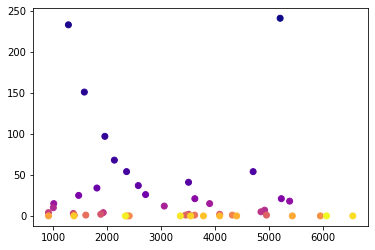

In [163]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dbscan = DBSCAN(eps=0.123, min_samples = 1)
clusters = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")

In [129]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

From this visualization, it would be reasonable to assume that darker datapoints would be better Italian restaurants to explore while lighter datapoints would be of less interest. To confirm that all of the venues within our dataframe are accounted for, we run the 'clusters' object, which returns an array containing indices of all 47 restaurants returned by Foursquare API with our given search query.

However, this is only based on two factors (distance and number of likes), so there are likely several other factors that would help improve our analysis and offer a more viable solution. 